### 5_DecisionTree_Entropy_Gini_Parameters

In [52]:
#  Copyright private in 2018 
#  Modify Date: 
#      2019- 9- 3 
#  Purpose : 
#       Decision Tree: Entropy/Gini Classifier Construction 
# ----------
#
# 

In [53]:
import numpy as np
import matplotlib.pyplot as plt 

### 1.基于信息熵构建决策树分类器模型

In [54]:
from sklearn import datasets 
iris = datasets.load_iris()
X    = iris.data[:,2:] # 行数不限制，只从第3列开始取出 ,正常情况下的数据集行数是140， 列数是 4 
y    = iris.target


# 数据集的数据的 行数和列数 - row_x, column_y.
row_x, column_x = iris.data.shape

print ('Row of datasets iris is :  ', row_x)
print ('Column of datasets iris is:', column_x)

#print ('============')
#print (X[2,:])
#print ('------------')#
# -----------
# 决策树分类器的生成
from sklearn.tree import DecisionTreeClassifier 
dt_clf = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy') # 训练标准是信息熵,最大的深度是2 
dt_clf.fit(X,y)

Row of datasets iris is :   150
Column of datasets iris is: 4


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 2.信息熵表示不确定性，不确定越高信息熵越大

In [27]:
# 信息熵 表示随机变量的不确定度，越不确定则表示信息熵越大
def entropy(p):
    return - p * np.log(p) - (1-p) * np.log(1-p)

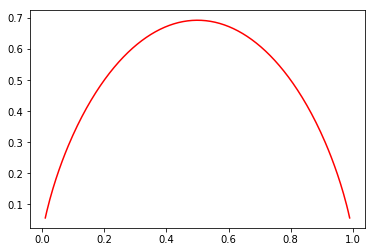

In [28]:
# 从 0 到1 去均匀的取值，形成向量
x = np.linspace(0.01, 0.99, 200)  # np.log 不能去0 或者是1 ，所以取 0.01 - 0.09 
plt.plot(x,entropy(x),color = 'r')
plt.show()

# 3.对所有节点上划分可能性进行搜索来知道那个划分是最优的

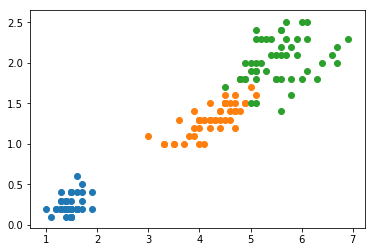

In [29]:
plt.scatter(X[y == 0,0], X[y == 0,1])
plt.scatter(X[y == 1,0], X[y == 1,1])
plt.scatter(X[y == 2,0], X[y == 2,1])
plt.show()

In [58]:
#利用信息熵来做决策树边界
def plot_decision_boundary(model,axis):
     x0,x1 = np.meshgrid(
         np.linspace(axis[0],axis[1], int((axis[1] - axis[0])*100 )).reshape(-1,1),
         np.linspace(axis[2],axis[3], int((axis[3] - axis[2])*100 )).reshape(-1,1)
     )
     X_new = np.c_[x0.ravel(),x1.ravel()]
     y_predict  = model.predict(X_new)
     zz         = y_predict.reshape(x0.shape)
    
     from matplotlib.colors import ListedColormap 
     custom_cmap = ListedColormap (['#EF9A00','#FFF89D', '#90CAF9'])
     plt.contourf(x0,x1,zz,cmap = custom_cmap )
     #plt.colorbar(orientation = 'horizontal')  # 增加水平colorbar 
     #plt.colorbar(orientation = 'vertical' )   # 增加垂直colorbar

In [31]:
# decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# max_depth - 表示决策树深度
# criterion - 拟合的标准
# random_state - 随机种子
dt_clf = DecisionTreeClassifier(max_depth = 2, criterion = "entropy", random_state= 42)
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

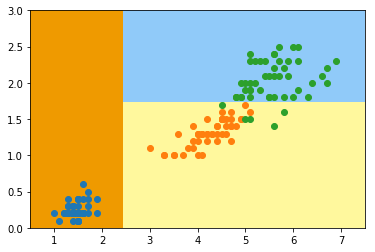

In [32]:
# plot the decision tree boundary
plot_decision_boundary(dt_clf, axis=[0.5,7.5, 0,3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [33]:
import numpy as np    
import matplotlib.pyplot as plt   
#x = np.arange(-4,5,1)  
#y = np.array((x>=-2)&(x<2),dtype='int')  

#--------------------------------------
#print ('x = ', x)
#print ('y  = ',y)
#print ('x[y==1] = ',x[y==1])
#print ('x[y==0] = ',x[y==0])

#--------------------------------------
#plt.scatter(x[y==0],[0]*len(x[y==0]))  
#plt.scatter(x[y==1],[0]*len(x[y==1]))  
#plt.show()#这时候数据是线性不可分的，需要通过核函数映射到高维空间 

### 3.模拟使用信息熵来做数据的划分

In [34]:
### 3.1 定义split 函数

In [35]:
from sklearn import datasets 
iris = datasets.load_iris()
X    = iris.data[:,2:] # 行数不限制，只从第3列开始取出 ,正常情况下的数据集行数是140， 列数是 4 
y    = iris.target

In [36]:
def split(X,y,d,value):
    # 在决策边界左边的值，在维度为d小于value 的所用index-left
    # 在决策边界右边的值，在维度为d小于value 的所用index-right 
    index_left   = (X[:,d]<= value)
    index_right  = (X[:,d]>value)
    return X[index_left],X[index_right],y[index_left],y[index_right]

In [37]:
X.shape

(150, 2)

In [38]:
### 试着在各个节点上找到是信息熵最小时对应的划分情况

In [39]:
from collections import Counter 
from math import log

# Counter(y) 
Counter(y).keys()
  

dict_keys([0, 1, 2])

In [40]:
len(X)

150

In [41]:
#np.argsort(X[:,1])

In [42]:
X.shape[1]

2

In [43]:
# 定义信息熵
from collections import Counter 
from math import log 
def entropy(y):
    counter = Counter(y) #  计算y中vlaues and key 
    res  = 0 
    for num in counter.values():
        p = num/len(y)   
        res += -p*log(p)
        return res

In [44]:
# 通过遍历所以特征值来寻找最小信息熵对应的数据样本
def try_split(X,y):
    
    # 预定义
    best_entropy = float('inf')  # 无穷大
    best_d, best_value = -1,-1 
    
    # 遍历搜索
    # shape[1] -列
    for d in range(X.shape[1]):
        # 先对第d个维度排序
        sorted_index = np.argsort(X[:,d]) 
        # len(X) 表示对样本总数。for i in len(x) 对样本做所有的遍历
        for i in range(1,len(X)):  #Len(X) - 表示X行数，也就是样本数目
            if X[sorted_index[i],d] != X[sorted_index[i-1],d]:
                values = (X[sorted_index[i],d] + X[sorted_index[i-1],d])/2
                
                X_l,X_r, y_l,y_r = split(X,y,d,values)
                p_l,p_r = len(X_l)/len(X),len(X_r)/len(X)
                e = p_l*entropy(y_l) + p_r*entropy(y_r)
               
                if e< best_entropy:
                    best_entropy,best_d,best_v = e,d,values
                
    return best_entropy,best_d,best_value

In [45]:
### 寻找最优值
best_entropy,best_d,best_v = try_split(X,y)
   

# print 
print("best_entropy = :",best_entropy)
print("best_d = :",best_d)
print("best_v = :",best_v)
        

best_entropy = : 0.030767470112275066
best_d = : 1
best_v = : -1


### 4.模拟使用基尼系数来做数据的划分

In [46]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X, y):
    
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                e = p_l * entropy(y_l) + p_r * entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
                
    return best_entropy, best_d, best_v


In [47]:
### 寻找最优值
best_entropy,best_d,best_v = try_split(X,y)
   

# print 
print("best_entropy = :",best_entropy)
print("best_d = :",best_d)
print("best_v = :",best_v)

best_entropy = : 0.46209812037329684
best_d = : 0
best_v = : 2.45


### 5.通过sklearn 自带的gini系数构建分类器

In [56]:
from sklearn.tree import DecisionTreeClassifier

# max_depth - 表示决策树深度
# criterion - gini 系数
# random_state - 随机种子
dt_clf = DecisionTreeClassifier(max_depth = 2, criterion = "gini", random_state= 42)
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

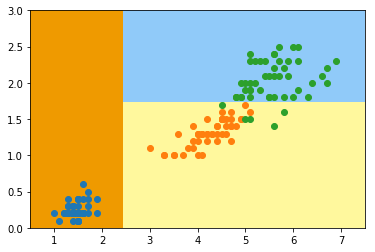

In [59]:
# plot decision boundary
plot_decision_boundary(dt_clf, axis=[0.5,7.5, 0,3])
plt.scatter(X[y == 0,0], X[y == 0,1])
plt.scatter(X[y == 1,0], X[y == 1,1])
plt.scatter(X[y == 2,0], X[y == 2,1])
plt.show()